# WEEK3 LAB
### Minju Jo

## 1. Multinomial Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:

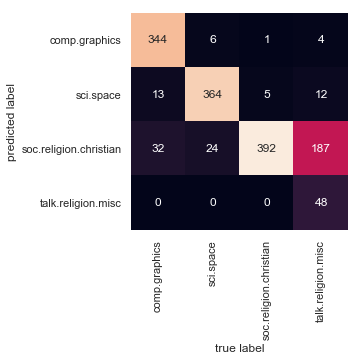

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here's a quick utility function that will return the prediction for a single string:

In [7]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [8]:
predict_category('sending a payload to the ISS')

'sci.space'

In [9]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [10]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.


## 2. 와인

In [11]:
import pandas as pd

In [12]:
wine = pd.read_csv("Wine.csv", header=None)

In [13]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


변수 이름을 features를 참고해서 바꿔주자 (target : class)

In [14]:
wine.columns=["class","alc","malic","ash","alc_of_ash","mag","to_phe","fla","nonfla","pro","col","hue","dilu","proline"]
wine.head()

,class,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wine.isnull().sum()

class         0
alc           0
malic         0
ash           0
alc_of_ash    0
mag           0
to_phe        0
fla           0
nonfla        0
pro           0
col           0
hue           0
dilu          0
proline       0
dtype: int64

na도 없다! 그럼 이제 변수들의 분포를 보자!

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


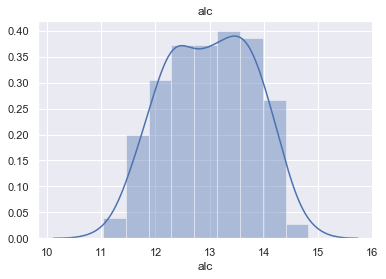

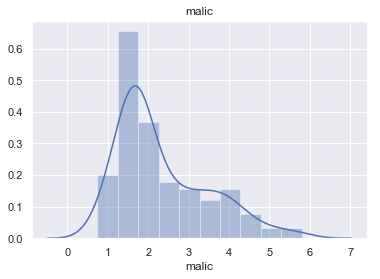

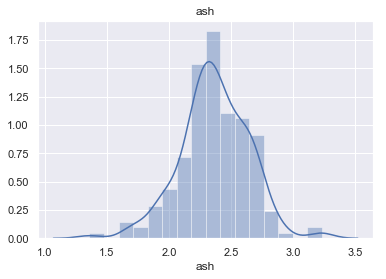

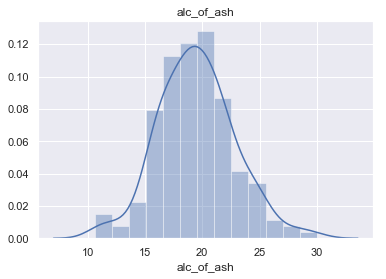

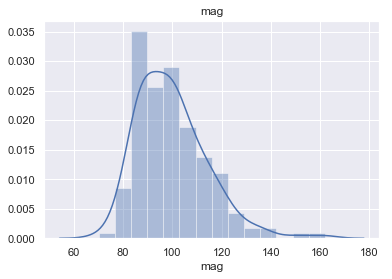

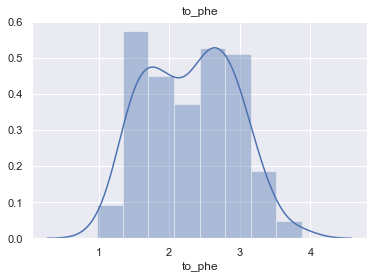

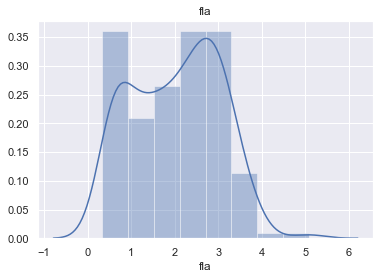

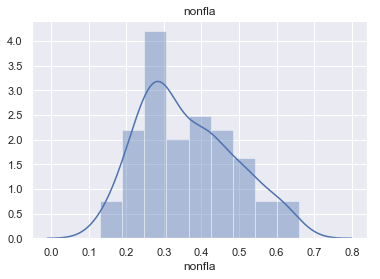

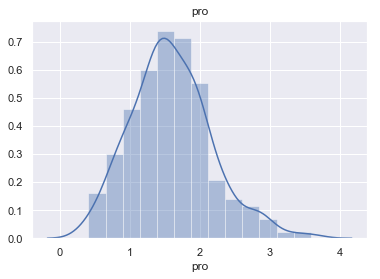

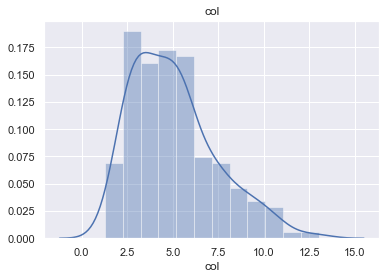

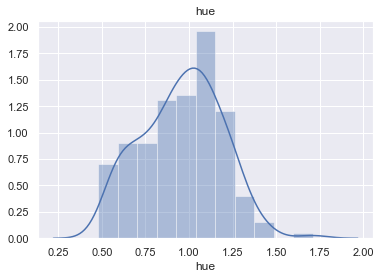

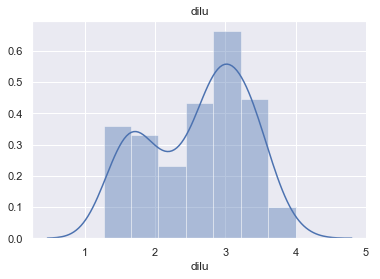

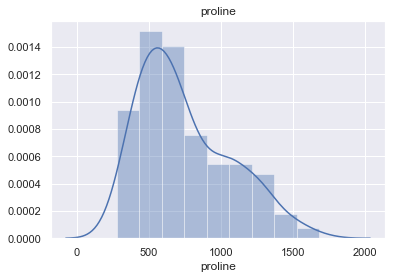

In [16]:
for col in wine.columns[1:]:
    sns.distplot(wine[col])
    plt.title(col)
    plt.show()

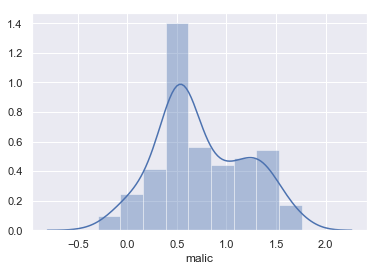

In [17]:
sns.distplot(np.log(wine["malic"]))

In [18]:
wine["malic"]=np.log(wine.loc[:,"malic"])

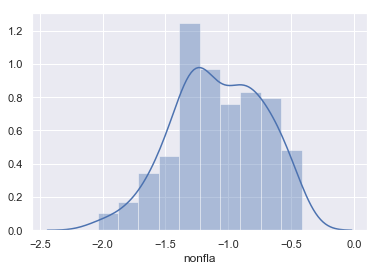

In [19]:
sns.distplot(np.log(wine["nonfla"]))

In [20]:
wine["nonfla"]=np.log(wine.loc[:,"nonfla"])

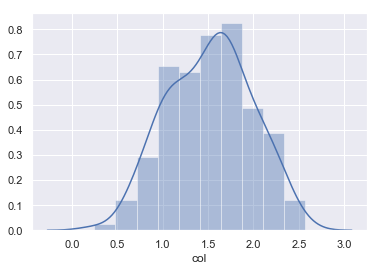

In [21]:
sns.distplot(np.log(wine["col"]))

In [22]:
wine["col"]=np.log(wine.loc[:,"col"])

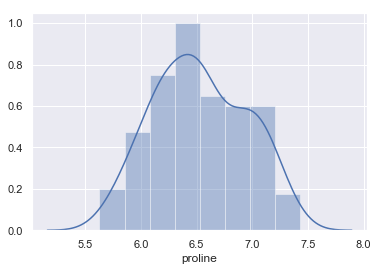

In [23]:
sns.distplot(np.log(wine["proline"]))

In [24]:
wine["proline"]=np.log(wine.loc[:,"proline"])

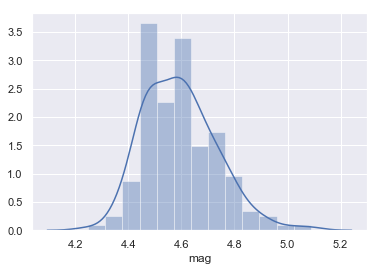

In [25]:
sns.distplot(np.log(wine["mag"]))

In [26]:
wine["mag"]=np.log(wine.loc[:,"mag"])

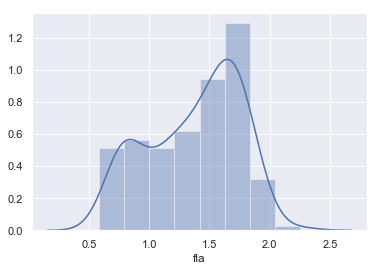

In [27]:
sns.distplot(np.sqrt(wine["fla"]))

In [28]:
wine["fla"]=np.log(wine.loc[:,"fla"])

이제 상관관계를 보자!

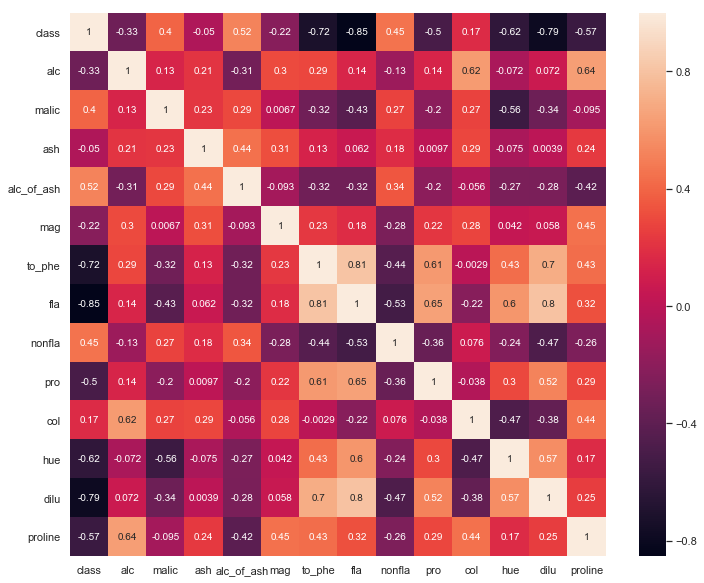

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

와웅!

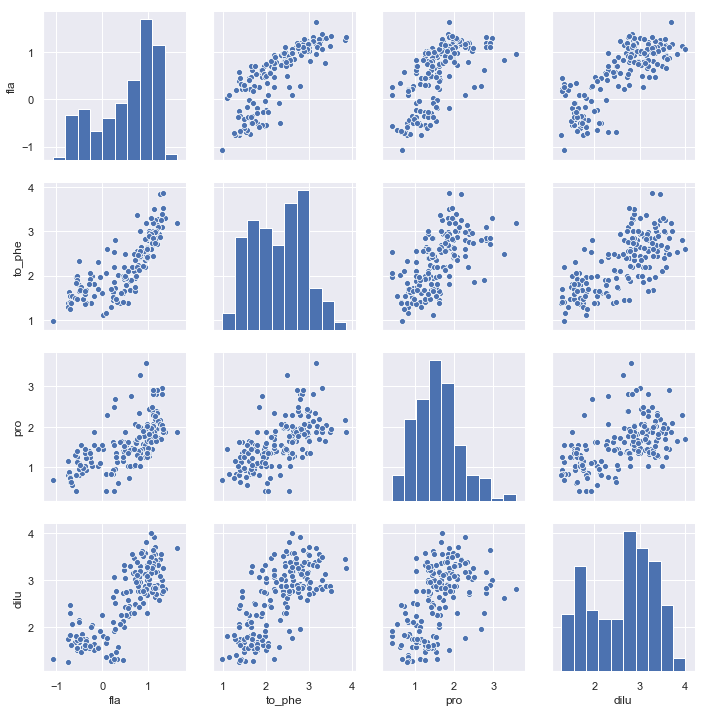

In [30]:
sns.pairplot(wine[["fla","to_phe","pro","dilu"]])
plt.show()

서로서로 너무 상관있다,, class랑 상관관계 가장높은 fla 빼고 다 버려야지 ㅎㅎ..

In [31]:
wine.drop(["to_phe","pro","dilu"], axis='columns', inplace=True)

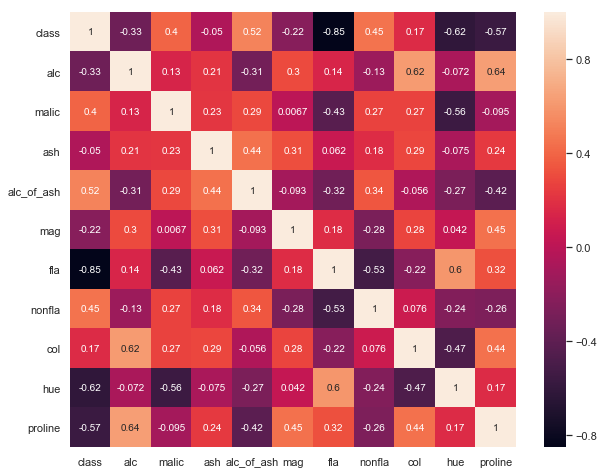

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(),annot=True)

In [33]:
(np.abs(wine.corr())>0.7).sum()

class         2
alc           1
malic         1
ash           1
alc_of_ash    1
mag           1
fla           2
nonfla        1
col           1
hue           1
proline       1
dtype: int64

이제 막 상관관계 높은 건 안보인당 (target변수인 class 제외)

Feature Importance를 본다

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

x=wine.iloc[:,1:]
y=wine.iloc[:,0]
model = ExtraTreesClassifier(n_estimators=100)
model.fit(x,y)

importance = pd.Series(model.feature_importances_)
importance.index=wine.columns[1:]

importance

alc           0.137015
malic         0.050562
ash           0.026646
alc_of_ash    0.034644
mag           0.044257
fla           0.222143
nonfla        0.031952
col           0.127533
hue           0.106307
proline       0.218940
dtype: float64

이 중에서 가장 큰 6개만 뽑자 (아니면 너무 overfitting 되길래,,)

In [35]:
six_import=importance.nlargest(6)
six_import

fla        0.222143
proline    0.218940
alc        0.137015
col        0.127533
hue        0.106307
malic      0.050562
dtype: float64

In [36]:
six_imp_target=list(six_import.index)
six_imp_target.insert(0,"class")

wine=wine.loc[:,six_imp_target]
wine.head()

,class,fla,proline,alc,col,hue,malic
0,1,1.118415,6.970730,14.23,1.729884,1.04,0.536493
1,1,1.015231,6.956545,13.20,1.477049,1.05,0.576613
2,1,1.175573,7.077498,13.16,1.736951,1.03,0.858662
3,1,1.249902,7.299797,14.37,2.054124,0.86,0.667829
4,1,0.989541,6.599870,13.24,1.463255,1.04,0.951658


In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.iloc[:,1:], wine["class"], test_size=0.3, random_state=421)

In [38]:
print(x_train.shape);print(y_train.shape);print(x_test.shape);print(y_test.shape)

(124, 6)
(124,)
(54, 6)
(54,)


In [39]:
def mse(model, X, y):
    return np.mean((y - model.predict(X)) ** 2)

In [40]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

### LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis().fit(x_train,y_train)
lda_tr_mse = mse(lda_model, x_train, y_train)
lda_te_mse = mse(lda_model, x_test, y_test)
print("LDA train mse : ", lda_tr_mse)
print("LDA test mse : ", lda_te_mse)

LDA train mse :  0.008064516129032258
LDA test mse :  0.037037037037037035


### QDA

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis().fit(x_train,y_train)
qda_tr_mse = mse(qda_model, x_train, y_train)
qda_te_mse = mse(qda_model, x_test, y_test)
print("QDA train mse : ", qda_tr_mse)
print("QDA test mse : ", qda_te_mse)

QDA train mse :  0.008064516129032258
QDA test mse :  0.018518518518518517


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(solver='sag', max_iter=100000, multi_class="auto")
logi_model.fit(x_train, y_train)
logi_tr_mse = mse(logi_model, x_train, y_train)
logi_te_mse = mse(logi_model, x_test, y_test)
print("Logistic Regression train mse : ", logi_tr_mse)
print("Logistic Regression test mse : ", logi_te_mse)

Logistic Regression train mse :  0.008064516129032258
Logistic Regression test mse :  0.05555555555555555


### Logistic Regression with feature expansion 

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for N in range(1, 4):
    poly = PolynomialFeatures(degree=N, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    logi_model.fit(x_train_poly, y_train)
    cv_error = np.mean(cross_val_score(logi_model, x_train_poly, y_train, scoring=mse, cv=5))
    
    print("MSE of degree" , N , " : ", cv_error)

MSE of degree 1  :  0.008695652173913044
MSE of degree 2  :  0.016387959866220735
MSE of degree 3  :  0.016695652173913045


그냥 expansion 안 하는게 더 낫다,,

### 결론

In [45]:
print("LDA Test MSE : ", lda_te_mse)
print("QDA Test MSE : ", qda_te_mse)
print("Logistic Regression Test MSE : ", logi_te_mse)

LDA Test MSE :  0.037037037037037035
QDA Test MSE :  0.018518518518518517
Logistic Regression Test MSE :  0.05555555555555555


QDA가 젤 낫다.